In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
import random
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [8]:
df1 = pd.read_csv('Observational data\dr6_x_gaiadr3.csv')
df2 = pd.read_csv('Observational data\dr6_orbits.csv')
df1

,rave_obs_id,source_id,solution_id,designation,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,pos,dist
0,20030412_0932m08_001,5740243341795436544,1636042515805110273,Gaia EDR3 5740243341795436544,1133274347,2016,142.604472,0.119838,-10.559554,0.120258,...,4,5500.0,4.5,0.0,243.682122,28.413683,148.699607,-23.929967,"(2.4889175729931 , -0.184298980909311)",1.989920
1,20030412_0932m08_003,5740185823593515648,1636042515805110273,Gaia EDR3 5740185823593515648,1501929477,2016,143.041734,0.013755,-10.662306,0.013256,...,0,NaN,NaN,NaN,244.081228,28.682693,149.179524,-23.877353,"(2.49654922921521 , -0.186092346626761)",0.203385
2,20030412_0932m08_004,5738635447774292352,1636042515805110273,Gaia EDR3 5738635447774292352,1810151436,2016,142.527397,0.011688,-11.284009,0.011945,...,0,NaN,NaN,NaN,244.266170,27.898506,148.897131,-24.635762,"(2.48757235396996 , -0.196943106193292)",0.400345
3,20030412_0932m08_006,5740980018881711872,1636042515805110273,Gaia EDR3 5740980018881711872,820238024,2016,142.262126,0.011512,-10.405491,0.009714,...,4,6000.0,3.5,0.0,243.306083,28.247859,148.295827,-23.901466,"(2.48294250509374 , -0.181610083109987)",0.231442
4,20030412_0932m08_007,5738638333992240512,1636042515805110273,Gaia EDR3 5738638333992240512,601165358,2016,142.285800,0.119092,-11.270723,0.113980,...,2,5500.0,4.5,0.0,244.085522,27.723053,148.647513,-24.705479,"(2.48335568191466 , -0.19671122216841)",1.458080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517352,20130404_1450m44_136,6100724383656554112,1636042515805110273,Gaia EDR3 6100724383656554112,1153773326,2016,223.967185,0.019465,-42.946800,0.020126,...,9,5000.0,3.0,0.0,325.904043,14.306419,234.450743,-25.021356,"(3.90896479341078 , -0.749563059840556)",0.248103
517353,20130404_1450m44_137,6100699571625309184,1636042515805110273,Gaia EDR3 6100699571625309184,1544245976,2016,223.723338,0.016317,-43.030507,0.018327,...,8,4000.0,3.0,0.0,325.700991,14.317007,234.293210,-25.157254,"(3.90470886936177 , -0.751024018023911)",0.156601
517354,20130404_1450m44_138,6100707268206033920,1636042515805110273,Gaia EDR3 6100707268206033920,1151721261,2016,223.415639,0.022600,-43.083902,0.028669,...,3,5000.0,3.0,0.0,325.470193,14.375328,234.076446,-25.279490,"(3.89933849342259 , -0.751955944281641)",0.087649
517355,20130404_1450m44_139,6100301960732183424,1636042515805110273,Gaia EDR3 6100301960732183424,1030059837,2016,223.134866,0.010948,-43.761844,0.013145,...,16,5000.0,3.0,0.0,324.959183,13.869753,234.103796,-25.987008,"(3.89443808033558 , -0.763788260587341)",0.138044


In [9]:
ra = np.array(df1['ra'])
dec = np.array(df1['dec'])
plx = np.array(df1['parallax'])
dis = np.array(df1['dist'])
pm_ra = np.array(df1['pmra'])
pm_dec = np.array(df1['pmdec'])
radVel = np.array(df1['dr2_radial_velocity'])

In [10]:
nanVals = np.argwhere(np.isnan(radVel))

rightAscension = np.delete(ra, nanVals)
declination = np.delete(dec, nanVals)
parallax = np.delete(plx, nanVals)
dist = abs(1/(parallax * 1e-3))
#dist = np.delete(dis, nanVals)
pm_rightAscension = np.delete(pm_ra, nanVals)
pm_declination = np.delete(pm_dec, nanVals)
radialVel = np.delete(radVel, nanVals)

In [11]:
print(len(rightAscension))

457194


In [22]:
bodies = [random.randint(0, len(radialVel)) for i in range(100)]

In [23]:
velocities = []
radii = []
cartCoords = []
for i in bodies:
    obj = coord.SkyCoord(ra = rightAscension[i]*u.degree, dec = declination[i]*u.degree,
                     distance = dist[i]*u.pc,
                     pm_ra_cosdec = pm_rightAscension[i]*u.mas/u.yr,
                     pm_dec = pm_declination[i]*u.mas/u.yr,
                     radial_velocity = radialVel[i]*u.km/u.s,
                     frame = 'icrs')
    g_obj = obj.transform_to(coord.Galactocentric)
    r = np.sqrt(g_obj.x.to_value()**2 + g_obj.y.to_value()**2 + g_obj.z.to_value()**2)
    v = np.sqrt(g_obj.v_x.to_value()**2 + g_obj.v_y.to_value()**2 + g_obj.v_z.to_value()**2)
    cartCoords.append([g_obj.x.to_value(), g_obj.y.to_value(), g_obj.z.to_value()])
    radii.append(r)
    velocities.append(v)

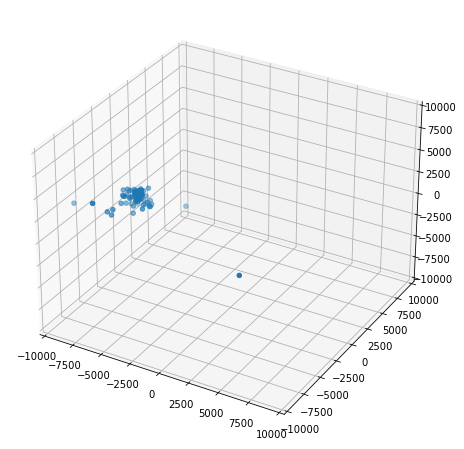

In [24]:
#%matplotlib widget
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(np.array(cartCoords).transpose()[0], np.array(cartCoords).transpose()[:][1], np.array(cartCoords).transpose()[:][2])
ax.set_xlim(-10000, 10000)
ax.set_ylim(-10000, 10000)
ax.set_zlim(-10000, 10000)
plt.show()

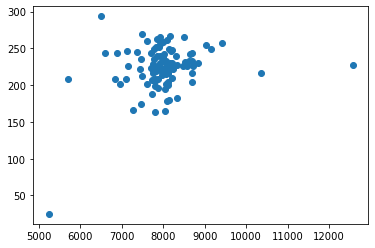

In [25]:
plt.scatter(radii, velocities)
plt.show()

***
## GAIA data

In [12]:
n_data = pd.read_csv('Observational data/gaiadr3_nrv.csv')
p_data = pd.read_csv('Observational data/gaiadr3_prv.csv')

ra = np.append(np.array(n_data['ra']), np.array(p_data['ra']))
dec = np.append(np.array(n_data['dec']), np.array(p_data['dec']))
plx = np.append(np.array(n_data['parallax']), np.array(p_data['parallax']))
dist = 1/(plx * 1e-3)
pmra = np.append(np.array(n_data['pmra']), np.array(p_data['pmra']))
pmdec = np.append(np.array(n_data['pmdec']), np.array(p_data['pmdec']))
rad_vel = np.append(np.array(n_data['radial_velocity']), np.array(p_data['radial_velocity']))

In [13]:
nans = np.argwhere(np.isnan(pmdec))
ra = np.delete(ra, nans)
dec = np.delete(dec, nans)
dist = np.delete(dist, nans)
pmra = np.delete(pmra, nans)
pmdec = np.delete(pmdec, nans)
rad_vel = np.delete(rad_vel, nans)

In [14]:
print(len(ra))

87


In [11]:


""" ra = np.array(data['ra'])
dec = np.array(data['dec'])
plx = np.array(data['parallax'])
pmra = np.array(data['pmra'])
pmdec = np.array(data['pmdec'])
rad_vel = np.array(data['radial_velocity'])
dist = 1/plx """

" ra = np.array(data['ra'])\ndec = np.array(data['dec'])\nplx = np.array(data['parallax'])\npmra = np.array(data['pmra'])\npmdec = np.array(data['pmdec'])\nrad_vel = np.array(data['radial_velocity'])\ndist = 1/plx "

In [12]:
radii = []
velocities = []
cartCoords = []
for i in range(len(ra)):
    obj = coord.SkyCoord(ra = ra[i]*u.degree, dec = dec[i]*u.degree,
                         distance = dist[i]*u.pc,
                         pm_ra_cosdec = pmra[i]*u.mas/u.yr,
                         pm_dec = pmdec[i]*u.mas/u.yr,
                         radial_velocity = rad_vel[i]*u.km/u.s,
                         frame = 'icrs')
    g_obj = obj.transform_to(coord.Galactocentric)
    r = np.sqrt(g_obj.x.to_value()**2 + g_obj.y.to_value()**2 + g_obj.z.to_value()**2)
    v = np.sqrt(g_obj.v_x.to_value()**2 + g_obj.v_y.to_value()**2 + g_obj.v_z.to_value()**2)
    cartCoords.append([g_obj.x.to_value(), g_obj.y.to_value(), g_obj.z.to_value()])
    radii.append(r)
    velocities.append(v)

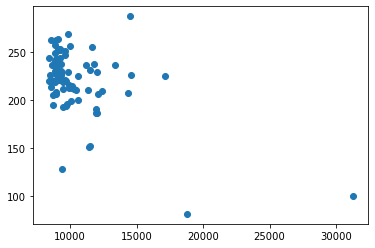

In [13]:
plt.scatter(radii, velocities)

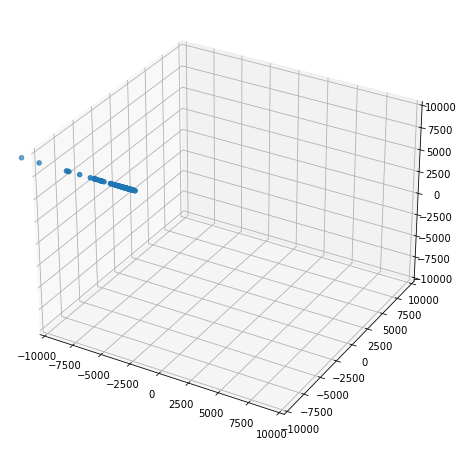

In [14]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(np.array(cartCoords).transpose()[0], np.array(cartCoords).transpose()[:][1], np.array(cartCoords).transpose()[:][2])
ax.set_xlim(-10000, 10000)
ax.set_ylim(-10000, 10000)
ax.set_zlim(-10000, 10000)
plt.show()

In [26]:
data_in = pd.read_csv('Observational data/gaiadr3_sgtA_dir.csv')
data_in

,designation,source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,bp_rp,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
0,Gaia DR3 4057463919588646400,4057463919588646400,266.465846,-29.165913,0.831495,2.367307,-1.214938,0.898588,10.583243,1.875079,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gaia DR3 4057463958250561792,4057463958250561792,266.487615,-29.147683,1.048905,0.728434,-3.739952,0.974942,14.329396,1.013307,...,False,True,True,5890.5120,4.2173,-0.8380,923.6811,0.6356,0.5287,0.2886
2,Gaia DR3 4057465401359561728,4057465401359561728,266.515916,-29.142168,0.885935,0.694473,-2.829177,0.922232,14.249881,1.020307,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gaia DR3 4057465470079054208,4057465470079054208,266.505931,-29.125802,0.339091,-0.854701,0.935058,0.975546,14.716004,2.785816,...,False,False,True,6618.5250,2.1327,-0.3564,6188.7417,5.5795,4.0982,2.3004
4,Gaia DR3 4057465568856213248,4057465568856213248,266.521188,-29.122835,2.403378,-25.469708,-22.801098,0.829994,12.835263,1.115588,...,False,True,True,5446.4053,4.2463,-0.4835,403.4528,0.5588,0.4544,0.2455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Gaia DR3 4057490174731431808,4057490174731431808,266.449871,-28.844737,1.167488,-6.036207,-4.435084,0.808739,10.811269,1.529569,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,Gaia DR3 4057492609970646144,4057492609970646144,266.408232,-28.858598,0.870130,-14.421128,-13.682551,0.925268,12.723620,2.046650,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,Gaia DR3 4057492713049854976,4057492713049854976,266.422791,-28.860072,0.401198,0.069473,-8.646968,0.780227,12.267524,5.009602,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,Gaia DR3 4057492717351715456,4057492717351715456,266.413529,-28.850389,0.833984,1.299154,0.337442,0.999045,14.338302,1.569472,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
ra = np.append(ra, np.array(data_in['ra']))
dec = np.append(dec, np.array(data_in['dec']))
dist = np.append(dist, abs(1/(np.array(data_in['parallax']) * 1e-3)))
pmra = np.append(pmra, np.array(data_in['pmra']))
pmdec = np.append(pmdec, np.array(data_in['pmdec']))
rad_vel = np.append(rad_vel, np.array(data_in['radial_velocity']))

In [56]:
len(ra)

318

In [46]:
nans = np.argwhere(np.isnan(pmdec))
ra = np.delete(ra, nans)
dec = np.delete(dec, nans)
dist = np.delete(dist, nans)
pmra = np.delete(pmra, nans)
pmdec = np.delete(pmdec, nans)
rad_vel = np.delete(rad_vel, nans)

In [96]:
random_bodies = [random.randint(0,len(ra)) for i in range(100)]
radii = []
velocities = []
cartCoords = []
for i in range(len(ra)):
    obj = coord.SkyCoord(ra = ra[i]*u.degree, dec = dec[i]*u.degree,
                         distance = dist[i]*u.pc,
                         pm_ra_cosdec = pmra[i]*u.mas/u.yr,
                         pm_dec = pmdec[i]*u.mas/u.yr,
                         radial_velocity = rad_vel[i]*u.km/u.s,
                         frame = 'icrs')
    g_obj = obj.transform_to(coord.Galactocentric)
    r = np.sqrt(g_obj.x.to_value()**2 + g_obj.y.to_value()**2 + g_obj.z.to_value()**2)
    v = np.sqrt(g_obj.v_x.to_value()**2 + g_obj.v_y.to_value()**2 + g_obj.v_z.to_value()**2)
    cartCoords.append([g_obj.x.to_value(), g_obj.y.to_value(), g_obj.z.to_value()])
    radii.append(r)
    velocities.append(v)

In [92]:
radii = np.array(radii)
lowerLim = np.where(radii >= 6000)[0]
upperLim = np.where(radii <= 10000)[0]
delete_bodies = []
for i in lowerLim:
    for j in upperLim:
        if i == j:
            delete_bodies.append(i)
delete_bodies

[1,
 2,
 3,
 5,
 6,
 7,
 9,
 11,
 12,
 13,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 29,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 46,
 47,
 49,
 50,
 52,
 53,
 54,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 71,
 72,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 91,
 93,
 94,
 100,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 113,
 114,
 115,
 116,
 117,
 118,
 120,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 138,
 139,
 141,
 142,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 157,
 158,
 159,
 160,
 162,
 163,
 164,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 181,
 182,
 185,
 187,
 188,
 189,
 190,
 191,
 193,
 194,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 209,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 220,
 221,
 223,
 224,
 225,
 227,
 232,
 233,
 234,
 235,
 236,
 238,
 239,
 240,
 241,
 242,
 245,
 246,
 247,
 249,
 250,
 251,
 252,
 253,
 254,

In [93]:
sourceFilter = [random.randint(min(delete_bodies), max(delete_bodies)) for i in range(250)]

In [94]:
radii = np.delete(radii, sourceFilter)
velocities = np.delete(velocities, sourceFilter)

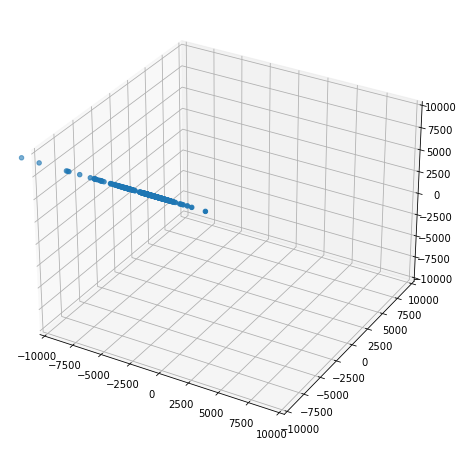

In [76]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(np.array(cartCoords).transpose()[0], np.array(cartCoords).transpose()[:][1], np.array(cartCoords).transpose()[:][2])
ax.set_xlim(-10000, 10000)
ax.set_ylim(-10000, 10000)
ax.set_zlim(-10000, 10000)
plt.show()

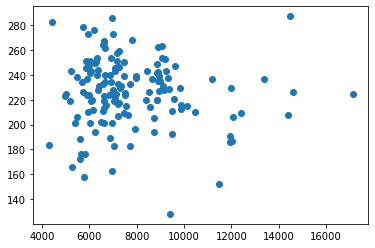

In [95]:
plt.scatter(radii, velocities)

***
## Try Combining the data

In [2]:
raveData = pd.read_csv('Observational data/dr6_x_gaiadr3.csv')
gaiaInData = pd.read_csv('observational data/gaiadr3_sgtA_dir.csv')
gaiaOutData1 = pd.read_csv('Observational data/gaiadr3_prv.csv')
gaiaOutData2 = pd.read_csv('Observational data/gaiadr3_nrv.csv')

In [3]:
rave = np.array(raveData['ra'])
rave_nan = np.argwhere(np.isnan(rave))
rave = np.delete(rave, rave_nan)
Gaia = np.concatenate((np.array(gaiaInData['ra']), np.array(gaiaOutData1['ra']), np.array(gaiaOutData2['ra'])))
gaia_nan = np.argwhere(np.isnan(Gaia))
Gaia = np.delete(Gaia, gaia_nan)

517357


In [4]:
ra = np.concatenate((np.array(raveData['ra']), np.array(gaiaInData['ra']), np.array(gaiaOutData1['ra']), np.array(gaiaOutData2['ra'])))
dec = np.concatenate((np.array(raveData['dec']), np.array(gaiaInData['dec']), np.array(gaiaOutData1['dec']), np.array(gaiaOutData2['dec'])))
plx = np.concatenate((np.array(raveData['parallax']), np.array(gaiaInData['parallax']), np.array(gaiaOutData1['parallax']), np.array(gaiaOutData2['parallax'])))
pmra = np.concatenate((np.array(raveData['pmra']), np.array(gaiaInData['pmra']), np.array(gaiaOutData1['pmra']), np.array(gaiaOutData2['pmra'])))
pmdec = np.concatenate((np.array(raveData['pmdec']), np.array(gaiaInData['pmdec']), np.array(gaiaOutData1['pmdec']), np.array(gaiaOutData2['pmdec'])))
radVel = np.concatenate((np.array(raveData['dr2_radial_velocity']), np.array(gaiaInData['radial_velocity']), np.array(gaiaOutData1['radial_velocity']), np.array(gaiaOutData2['radial_velocity'])))
dist = abs((1/(plx * 1e-3)))

In [5]:
raNan = np.argwhere(np.isnan(ra))
decNan = np.argwhere(np.isnan(dec))
distNan = np.argwhere(np.isnan(dist))
pmraNan = np.argwhere(np.isnan(pmra))
pmdecNan = np.argwhere(np.isnan(pmdec))
radVelNan = np.argwhere(np.isnan(radVel))

nans = np.concatenate((raNan, decNan, distNan, pmraNan, pmdecNan, radVelNan))
len(np.unique(nans))

61934

In [6]:
ra = np.delete(ra, nans)
dec = np.delete(dec, nans)
dist = np.delete(dist, nans)
pmra = np.delete(pmra, nans)
pmdec = np.delete(pmdec, nans)
radVel = np.delete(radVel, nans)

In [7]:
randomBodies = [random.randint(0,len(ra)) for i in range(1000)]
radii = []
velocities = []
cartCoords = []
for i in randomBodies:
    obj = coord.SkyCoord(ra = ra[i]*u.degree, dec = dec[i]*u.degree,
                         distance = dist[i]*u.pc,
                         pm_ra_cosdec = pmra[i]*u.mas/u.yr,
                         pm_dec = pmdec[i]*u.mas/u.yr,
                         radial_velocity = radVel[i]*u.km/u.s,
                         frame = 'icrs')
    g_obj = obj.transform_to(coord.Galactocentric)
    r = np.sqrt(g_obj.x.to_value()**2 + g_obj.y.to_value()**2 + g_obj.z.to_value()**2)
    v = np.sqrt(g_obj.v_x.to_value()**2 + g_obj.v_y.to_value()**2 + g_obj.v_z.to_value()**2)
    cartCoords.append([g_obj.x.to_value(), g_obj.y.to_value(), g_obj.z.to_value()])
    radii.append(r)
    velocities.append(v)

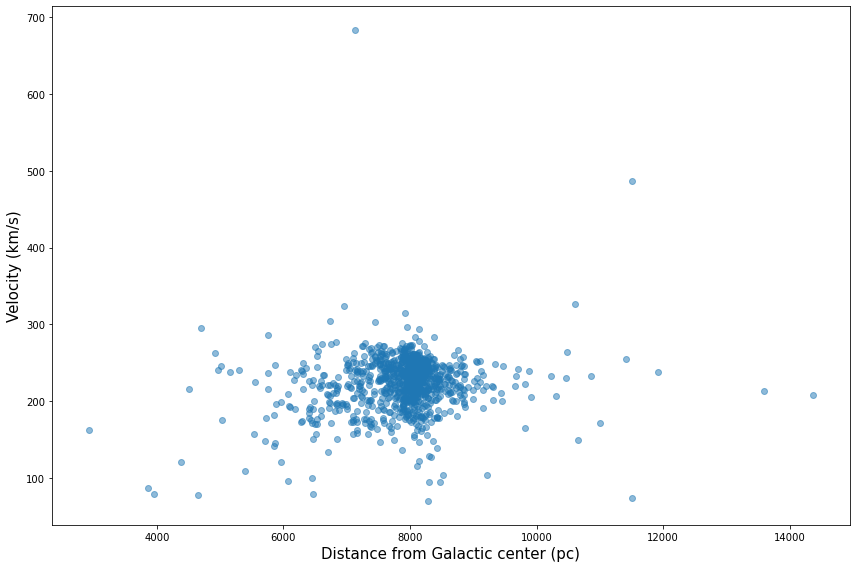

In [10]:
plt.figure(figsize = (12,8))
plt.scatter(np.array(radii)[np.array(radii) < 15000], np.array(velocities)[np.array(radii) < 15000], alpha = 0.5)
plt.xlabel('Distance from Galactic center (pc)', fontsize = 15)
plt.ylabel('Velocity (km/s)', fontsize = 15)
plt.tight_layout()
plt.savefig('C://Users/tyler/Documents/Alpha Folder/00-School/00-Lycoming/01-Active Classes/PHYS 448-A/Writing/Final Paper/Figures/initial_obs.pdf')
plt.show()

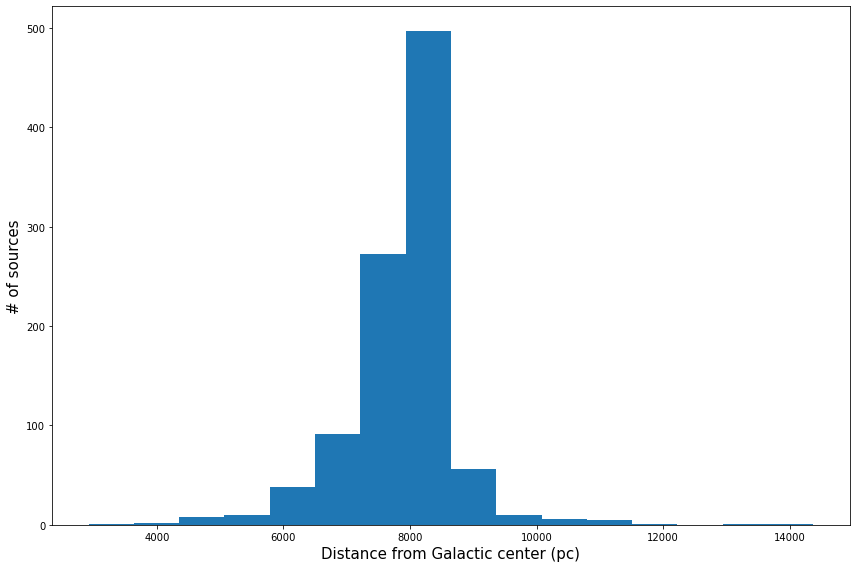

In [9]:
plt.figure(figsize = (12,8))
plt.hist(radii, bins = 16)
plt.xlabel('Distance from Galactic center (pc)', fontsize = 15)
plt.ylabel('# of sources', fontsize = 15)
plt.tight_layout()
plt.savefig('C://Users/tyler/Documents/Alpha Folder/00-School/00-Lycoming/01-Active Classes/PHYS 448-A/Writing/Final Paper/Figures/initial_obs_hist.pdf')

In [27]:
ranges = [(i*500, i*500 + 499) for i in range(8,24)]
keepingSources = []
for i in ranges:
    upper = np.where(np.array(radii) >= i[0])[0]
    lower = np.where(np.array(radii) <= i[1])[0]
    bin = []
    for j in upper:
        for k in lower:
            if j == k:
                bin.append(j)
    if len(bin) < 10:
        keepingSources += bin
    else:
        for l in range(10):
            pick = random.choice(bin)
            while len(np.where(np.array(keepingSources) == pick)[0]) != 0:
                pick = random.choice(bin)
            keepingSources.append(pick)
        
keptRadii = [radii[i] for i in keepingSources]
keptVel = [velocities[i] for i in keepingSources]

In [22]:
ranges

[(4000, 4499),
 (4500, 4999),
 (5000, 5499),
 (5500, 5999),
 (6000, 6499),
 (6500, 6999),
 (7000, 7499),
 (7500, 7999),
 (8000, 8499),
 (8500, 8999),
 (9000, 9499),
 (9500, 9999),
 (10000, 10499),
 (10500, 10999),
 (11000, 11499),
 (11500, 11999)]

In [25]:
keptRadii = [radii[i] for i in keepingSources]
keptVel = [velocities[i] for i in keepingSources]

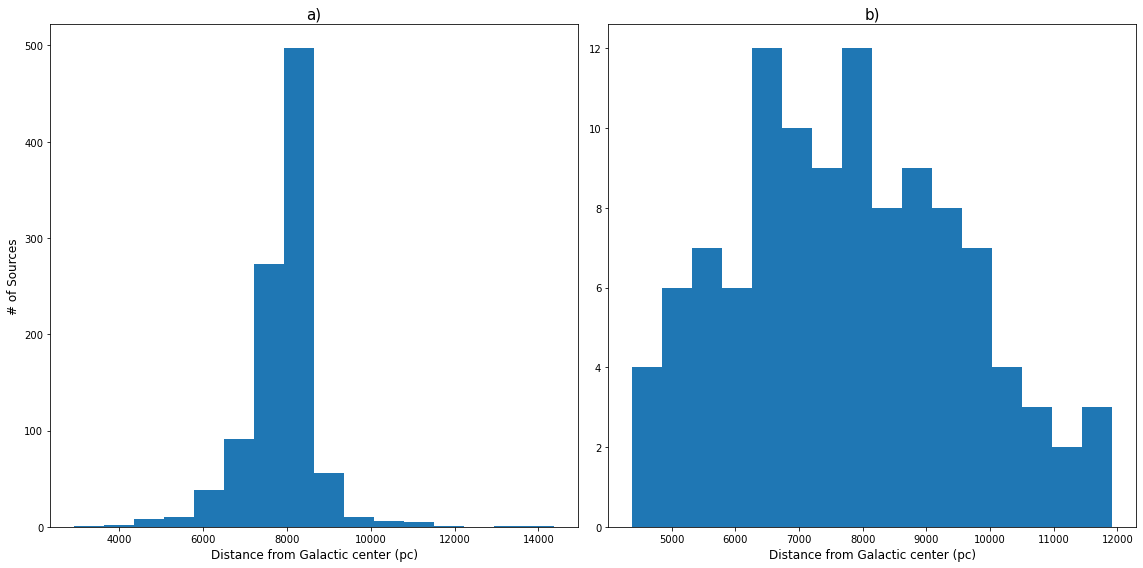

In [33]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121)
ax1.hist(radii, bins = 16)
ax1.set_xlabel('Distance from Galactic center (pc)', fontsize = 12)
ax1.set_ylabel('# of Sources', fontsize = 12)
ax1.set_title('a)', fontsize = 15)

ax2 = fig.add_subplot(122)
ax2.hist(keptRadii, bins = 16)
ax2.set_xlabel('Distance from Galactic center (pc)', fontsize = 12)
ax2.set_title('b)', fontsize = 15)

plt.tight_layout()
plt.savefig('C://Users/tyler/Documents/Alpha Folder/00-School/00-Lycoming/01-Active Classes/PHYS 448-A/Writing/Final Paper/Figures/obs_hists.pdf')
plt.show()


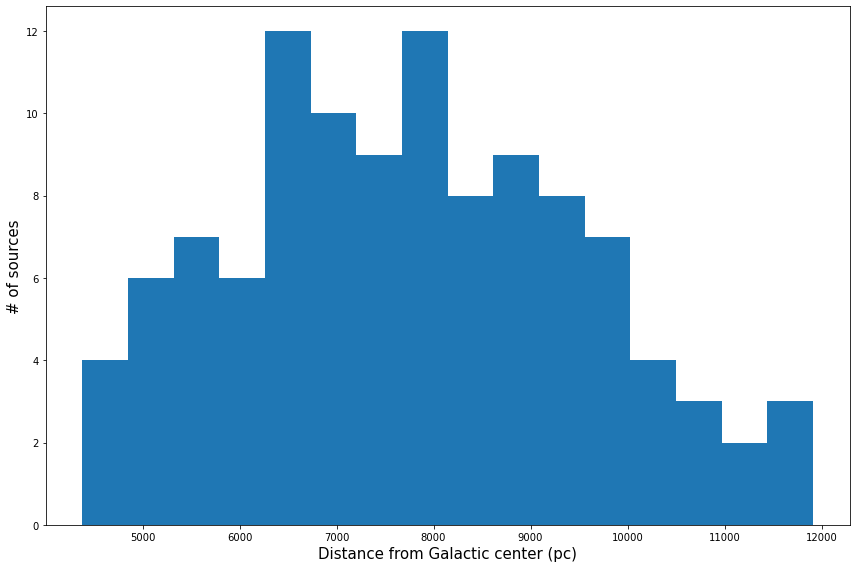

In [28]:
plt.figure(figsize = (12,8))
plt.hist(keptRadii, bins = 16)
plt.xlabel('Distance from Galactic center (pc)', fontsize = 15)
plt.ylabel('# of sources', fontsize = 15)
plt.tight_layout()
plt.savefig('C://Users/tyler/Documents/Alpha Folder/00-School/00-Lycoming/01-Active Classes/PHYS 448-A/Writing/Final Paper/Figures/final_obs_hist.pdf')

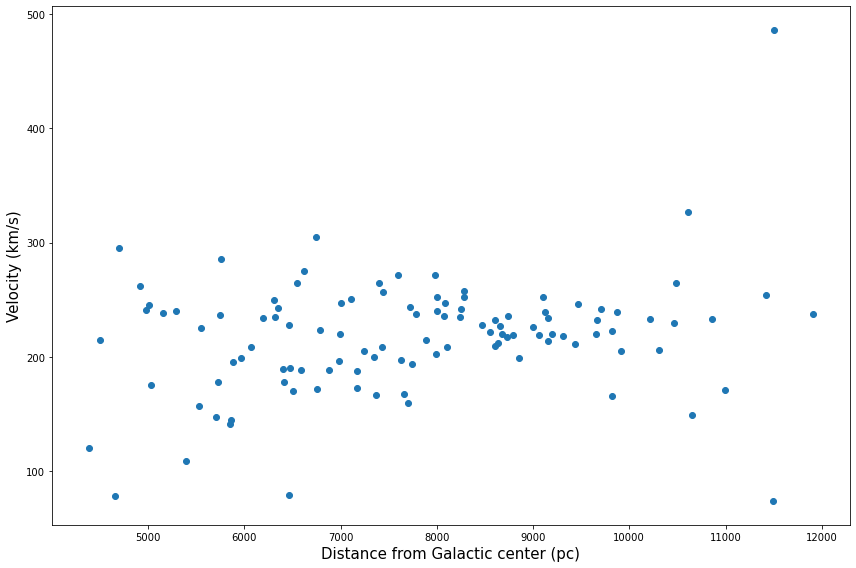

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(keptRadii, keptVel)
plt.xlabel('Distance from Galactic center (pc)', fontsize = 15)
plt.ylabel('Velocity (km/s)', fontsize = 15)
plt.tight_layout()
plt.savefig('C://Users/tyler/Documents/Alpha Folder/00-School/00-Lycoming/01-Active Classes/PHYS 448-A/Writing/Final Paper/Figures/final_obs.pdf')
plt.show()

In [83]:
pipe = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                 ('model', LinearRegression())])
pipe.fit(np.array(keptRadii).reshape(-1,1), np.array(keptVel).reshape(-1,1))

xLine = np.linspace(min(keptRadii), max(keptRadii), 100)
prediction = pipe.predict(xLine.reshape(-1,1))

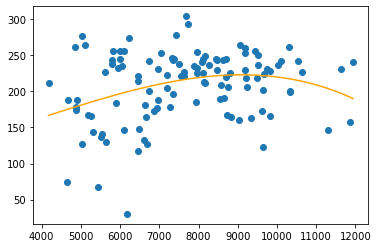

In [84]:
plt.scatter(keptRadii, keptVel)
plt.plot(xLine, prediction, color = 'orange')
plt.show()

In [11]:
data = np.array([keptRadii, keptVel]).transpose()
fields = ['radius', 'velocity']
filename = 'processed_data.csv'
with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(data)

In [59]:
imported_data = pd.read_csv('processed_data.csv')
imported_data

,radius,velocity
0,4174.719753,211.895182
1,4882.685189,177.800436
2,4882.959756,174.567615
3,4681.543667,188.052811
4,4901.334054,187.444477
...,...,...
109,10639.265945,227.362026
110,11309.097527,146.787875
111,11937.415274,240.859575
112,11642.741991,230.803049


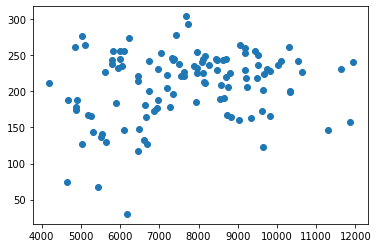

In [60]:
plt.scatter(imported_data['radius'], imported_data['velocity'])